# Avacado Project to Predict Prices

Avacado Data Description : 

This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 



Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

Date - The date of the observation

AveragePrice - the average price of a single avocado

type - conventional or organic

year - the year

Region - the city or region of the observation

Total Volume - Total number of avocados sold

4046 - Total number of avocados with PLU 4046 sold

4225 - Total number of avocados with PLU 4225 sold

4770 - Total number of avocados with PLU 4770 sold


### We have to Predict the Average Price of the avacado 

#### Here we start the project by importing essential Libraries for Importing Datasets, EDA, Data Cleaning, Model Building, Removing Outliers and Predicting the average price

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import joblib
import warnings
from scipy.stats import zscore
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import power_transform, LabelEncoder, OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from xgboost import XGBRFRegressor
warnings.filterwarnings('ignore')
%matplotlib inline

As we have completed importing of Essesential Libraries now we will import the data and look at the data closely.

In [2]:
#here we are importing the data using pandas.read_csv()method and saving it in ds varible
ds = pd.read_csv('~/Desktop/Datatrained/Avacado Project/avocado.csv')

Now we will see the first 5 rows of the dataset using ds.head()

In [3]:
ds.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


from here we can see the dataset is a mixture of object, float64, datatypes lets see the count of datatype using ds.info() it will give all the infromation about the data

In [4]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16468 entries, 0 to 16467
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1517 non-null   float64
 1   Date          1517 non-null   object 
 2   AveragePrice  1517 non-null   float64
 3   Total Volume  1517 non-null   float64
 4   4046          1517 non-null   float64
 5   4225          1517 non-null   float64
 6   4770          1517 non-null   float64
 7   Total Bags    1517 non-null   float64
 8   Small Bags    1517 non-null   float64
 9   Large Bags    1517 non-null   float64
 10  XLarge Bags   1517 non-null   float64
 11  type          1517 non-null   object 
 12  year          1517 non-null   float64
 13  region        1517 non-null   object 
dtypes: float64(11), object(3)
memory usage: 1.8+ MB


from above we can see that there are 16468 rows and 14 columns.

There are 11 float64 data, 3 object data type in the dataset

Datset size is 1.8mb+ that means the dataset has more number of rows as mentioned above

Now lets see if the dataset contains missing values or not

In [5]:
#By using ds.isnull().sum() we can find out which column in the dataset has missing values and how much is the count 
ds.isnull().sum()

Unnamed: 0      14951
Date            14951
AveragePrice    14951
Total Volume    14951
4046            14951
4225            14951
4770            14951
Total Bags      14951
Small Bags      14951
Large Bags      14951
XLarge Bags     14951
type            14951
year            14951
region          14951
dtype: int64

As all the columns has same number of missing rows we will drop 14951 rows from the dataset

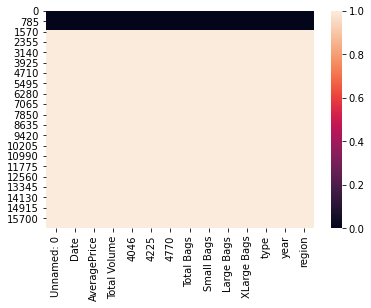

In [6]:
sns.heatmap(ds.isnull())

In [7]:
ds.dropna(inplace=True)

In [8]:
ds.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

From above we can see that we have successfully droped all the rows which as missing values and now we have 0 missing values in all the columns

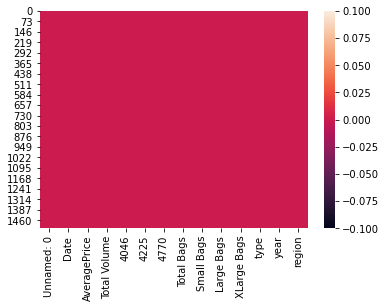

In [9]:
sns.heatmap(ds.isnull())

lets now see the information about the data usind ds.info()

In [10]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1516
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1517 non-null   float64
 1   Date          1517 non-null   object 
 2   AveragePrice  1517 non-null   float64
 3   Total Volume  1517 non-null   float64
 4   4046          1517 non-null   float64
 5   4225          1517 non-null   float64
 6   4770          1517 non-null   float64
 7   Total Bags    1517 non-null   float64
 8   Small Bags    1517 non-null   float64
 9   Large Bags    1517 non-null   float64
 10  XLarge Bags   1517 non-null   float64
 11  type          1517 non-null   object 
 12  year          1517 non-null   float64
 13  region        1517 non-null   object 
dtypes: float64(11), object(3)
memory usage: 177.8+ KB


from above we can see that there are 1517 rows and 14 columns and the dataset has no null values in it

lets now see the shape of the data for further understanding

In [11]:
r, c = ds.shape
print("There are total {} number of Rows and {} number of column".format(r, c))

There are total 1517 number of Rows and 14 number of column


From above also we can see that there are 1517 Number of Rows and 14 columns as we have seen from the info of the data

lets now look for Stastical Representation of data by using ds.describe() it will give us all the statistic of the datasets

In [12]:
ds.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1517.0,2.699539e+01,1.484829e+01,0.00,14.00,29.00,39.00,51.00
AveragePrice,1517.0,1.074990e+00,1.888912e-01,0.49,0.98,1.08,1.19,1.68
Total Volume,1517.0,1.601879e+06,4.433143e+06,38750.74,147469.99,402791.86,981975.08,44655461.51
4046,1517.0,6.464387e+05,1.947614e+06,467.72,20400.34,81751.17,377578.48,18933038.04
4225,1517.0,6.114375e+05,1.672906e+06,1783.77,41476.06,118664.89,485150.34,18956479.74
4770,1517.0,5.040550e+04,1.377812e+05,0.00,911.25,7688.17,29167.30,1381516.11
Total Bags,1517.0,2.935974e+05,7.579765e+05,3311.77,36206.89,73979.06,157609.68,6736304.04
Small Bags,1517.0,2.487736e+05,6.474765e+05,3311.77,29727.22,62375.69,146199.35,5893641.72
Large Bags,1517.0,4.264205e+04,1.182157e+05,0.00,540.74,5044.35,29267.67,1121076.47
XLarge Bags,1517.0,2.181771e+03,7.455712e+03,0.00,0.00,0.00,401.48,108072.79


so here we have got the stastics of all the foloat64 variable as for categorical variable we will not able to get the statistics we will later converted the categorical variable to numeric with encoder

lets now see the graphical representation of the ds.describe() using Seaborn

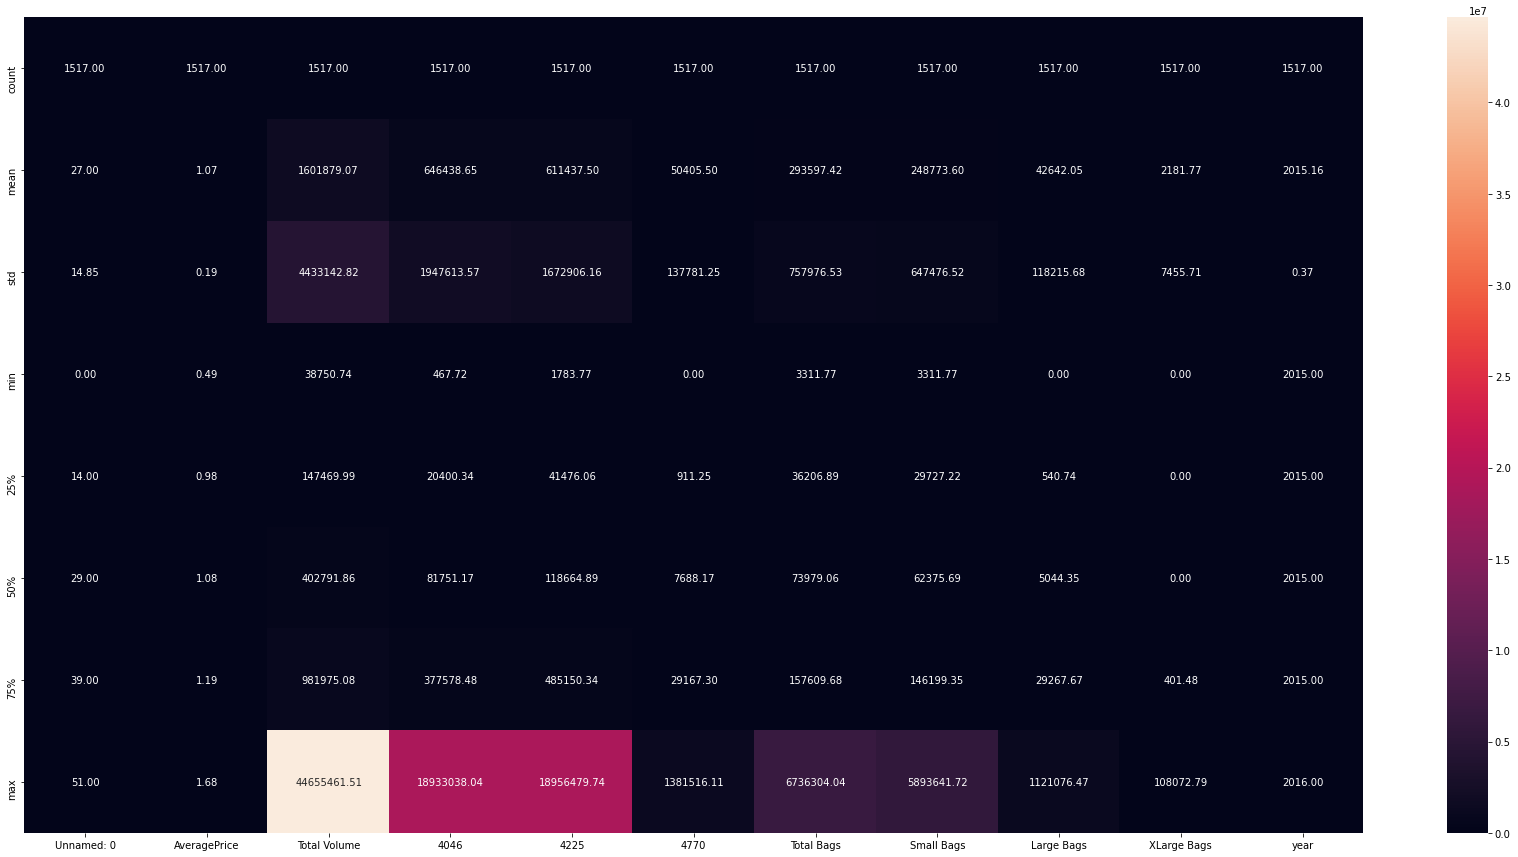

In [13]:
plt.figure(figsize = (30,15))
sns.heatmap(ds.describe(), annot=True, fmt='.2f')

from this graph we can see that most of the values are in the same range but some of them are having high maximum values so we will check if it is an outlier in the later point of time and fix it.

### Lets now start with EDA process 

In [14]:
ds.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


lets now drop year, Unnamed: 0 and Date as it is not helping us in any process

In [15]:
ds.drop(['Unnamed: 0'],axis=1, inplace=True)

In [16]:
ds.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


as we have droped the un-necessary column lets now visualized the data

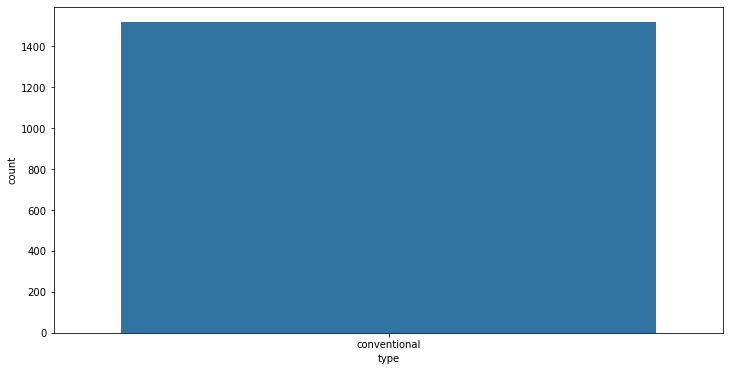

In [17]:
plt.figure(figsize = (12,6))
sns.countplot(ds['type'])

from above we can see that there is only 1 type of Avocado in the dataset that is Conventional Type.

lets see how many regions are there in the dataset

California             76
Albany                 67
Boise                  65
BaltimoreWashington    65
Boston                 62
Atlanta                54
PhoenixTucson          52
BuffaloRochester       51
Spokane                49
Columbus               47
NewYork                44
Jacksonville           41
Detroit                40
SouthCentral           39
SanDiego               38
West                   36
Louisville             34
Tampa                  34
Charlotte              31
Portland               30
NorthernNewEngland     29
Houston                29
WestTexNewMexico       27
Nashville              25
TotalUS                25
Denver                 24
SouthCarolina          24
GrandRapids            23
Chicago                23
Pittsburgh             22
RichmondNorfolk        21
Orlando                21
HarrisburgScranton     19
Syracuse               19
GreatLakes             18
Midsouth               18
DallasFtWorth          17
MiamiFtLauderdale      17
Roanoke     

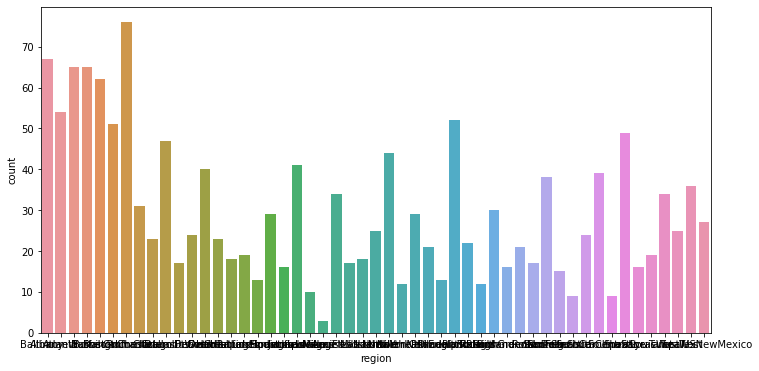

In [18]:
plt.figure(figsize = (12,6))
sns.countplot(ds['region'])
ds['region'].value_counts()

we can see the name and count of the region and  California has the highest number of Instances in the dataset

In [19]:
ds.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


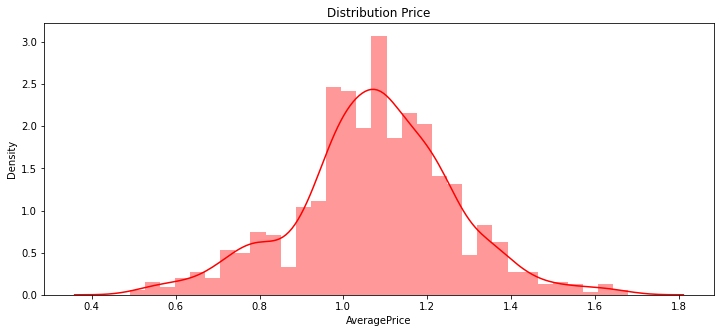

In [20]:
plt.figure(figsize=(12,5))
plt.title("Distribution Price")
sns.distplot(ds["AveragePrice"], color = 'r')

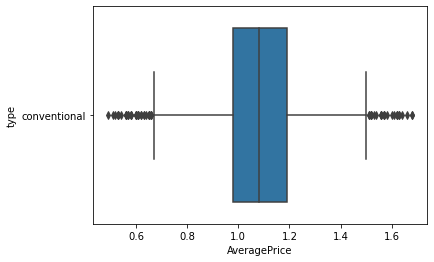

In [21]:
sns.boxplot(y="type", x="AveragePrice", data=ds)

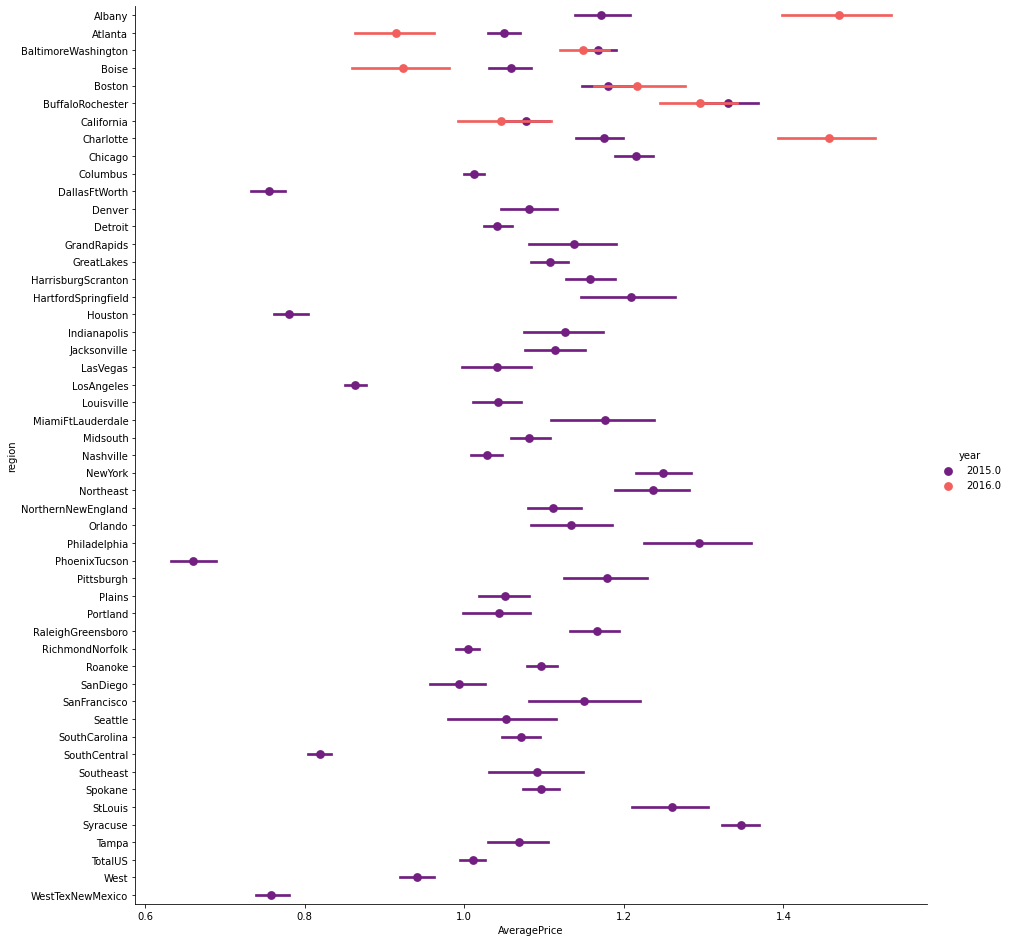

In [22]:
mask = ds['type']=='conventional'
sns.factorplot('AveragePrice','region',data=ds[mask],hue='year',size=13,palette='magma',join=False)

from above we can see the prices of Conventional Avocados from different regions

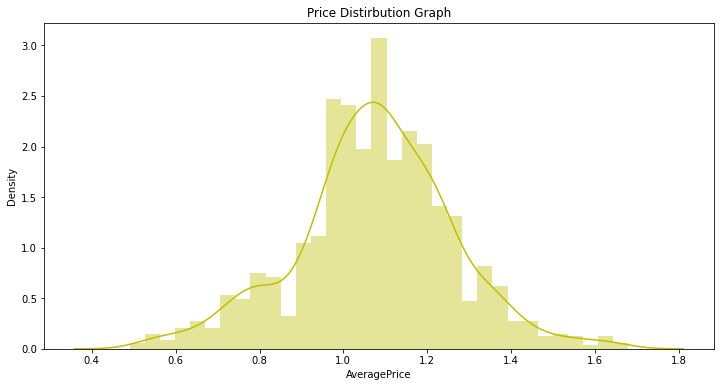

In [23]:
plt.figure(figsize=(12,6))
plt.title("Price Distirbution Graph")
ax = sns.distplot(ds['AveragePrice'], color = 'y')

Text(0.5, 1.0, 'Average Price')

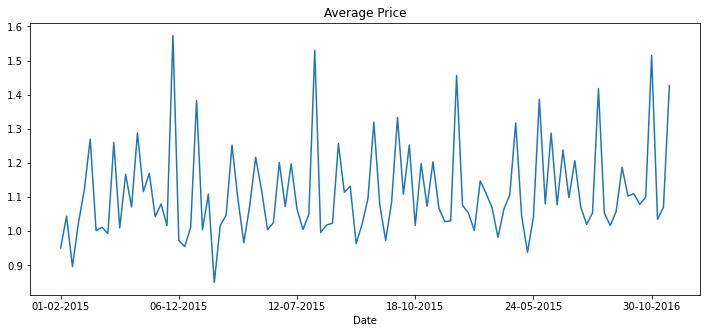

In [24]:
dategroup=ds.groupby('Date').mean()
plt.figure(figsize=(12,5))
dategroup['AveragePrice'].plot(x=ds.Date)
plt.title('Average Price')

Lets see the correlation of the dataset using ds.corr()

In [25]:
ds.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
AveragePrice,1.000000,-0.140470,-0.190096,-0.092084,-0.100567,-0.111597,-0.097682,-0.177480,-0.048284,0.178683
Total Volume,-0.140470,1.000000,0.985568,0.987154,0.934347,0.967689,0.960642,0.910226,0.521717,-0.004189
4046,-0.190096,0.985568,1.000000,0.951952,0.898570,0.930395,0.922278,0.884229,0.474063,-0.040439
4225,-0.092084,0.987154,0.951952,1.000000,0.927757,0.951779,0.943988,0.900496,0.504718,-0.007254
4770,-0.100567,0.934347,0.898570,0.927757,1.000000,0.926405,0.923607,0.840523,0.646053,0.029222
Total Bags,-0.111597,0.967689,0.930395,0.951779,0.926405,1.000000,0.997341,0.911336,0.601856,0.090108
Small Bags,-0.097682,0.960642,0.922278,0.943988,0.923607,0.997341,1.000000,0.879131,0.611300,0.106382
Large Bags,-0.177480,0.910226,0.884229,0.900496,0.840523,0.911336,0.879131,1.000000,0.447779,-0.018678
XLarge Bags,-0.048284,0.521717,0.474063,0.504718,0.646053,0.601856,0.611300,0.447779,1.000000,0.218342
year,0.178683,-0.004189,-0.040439,-0.007254,0.029222,0.090108,0.106382,-0.018678,0.218342,1.000000


lets now visualize this so that it will be easy to understand

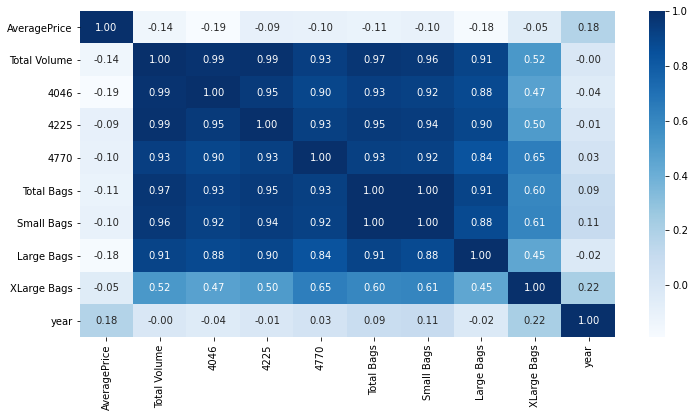

In [26]:
plt.figure(figsize = (12,6))
sns.heatmap(ds.corr(), annot = True, cmap = 'Blues', fmt='.2f')

darker the area more is the correlation so we can see that year don't have that much correlation with the data so we can remove that

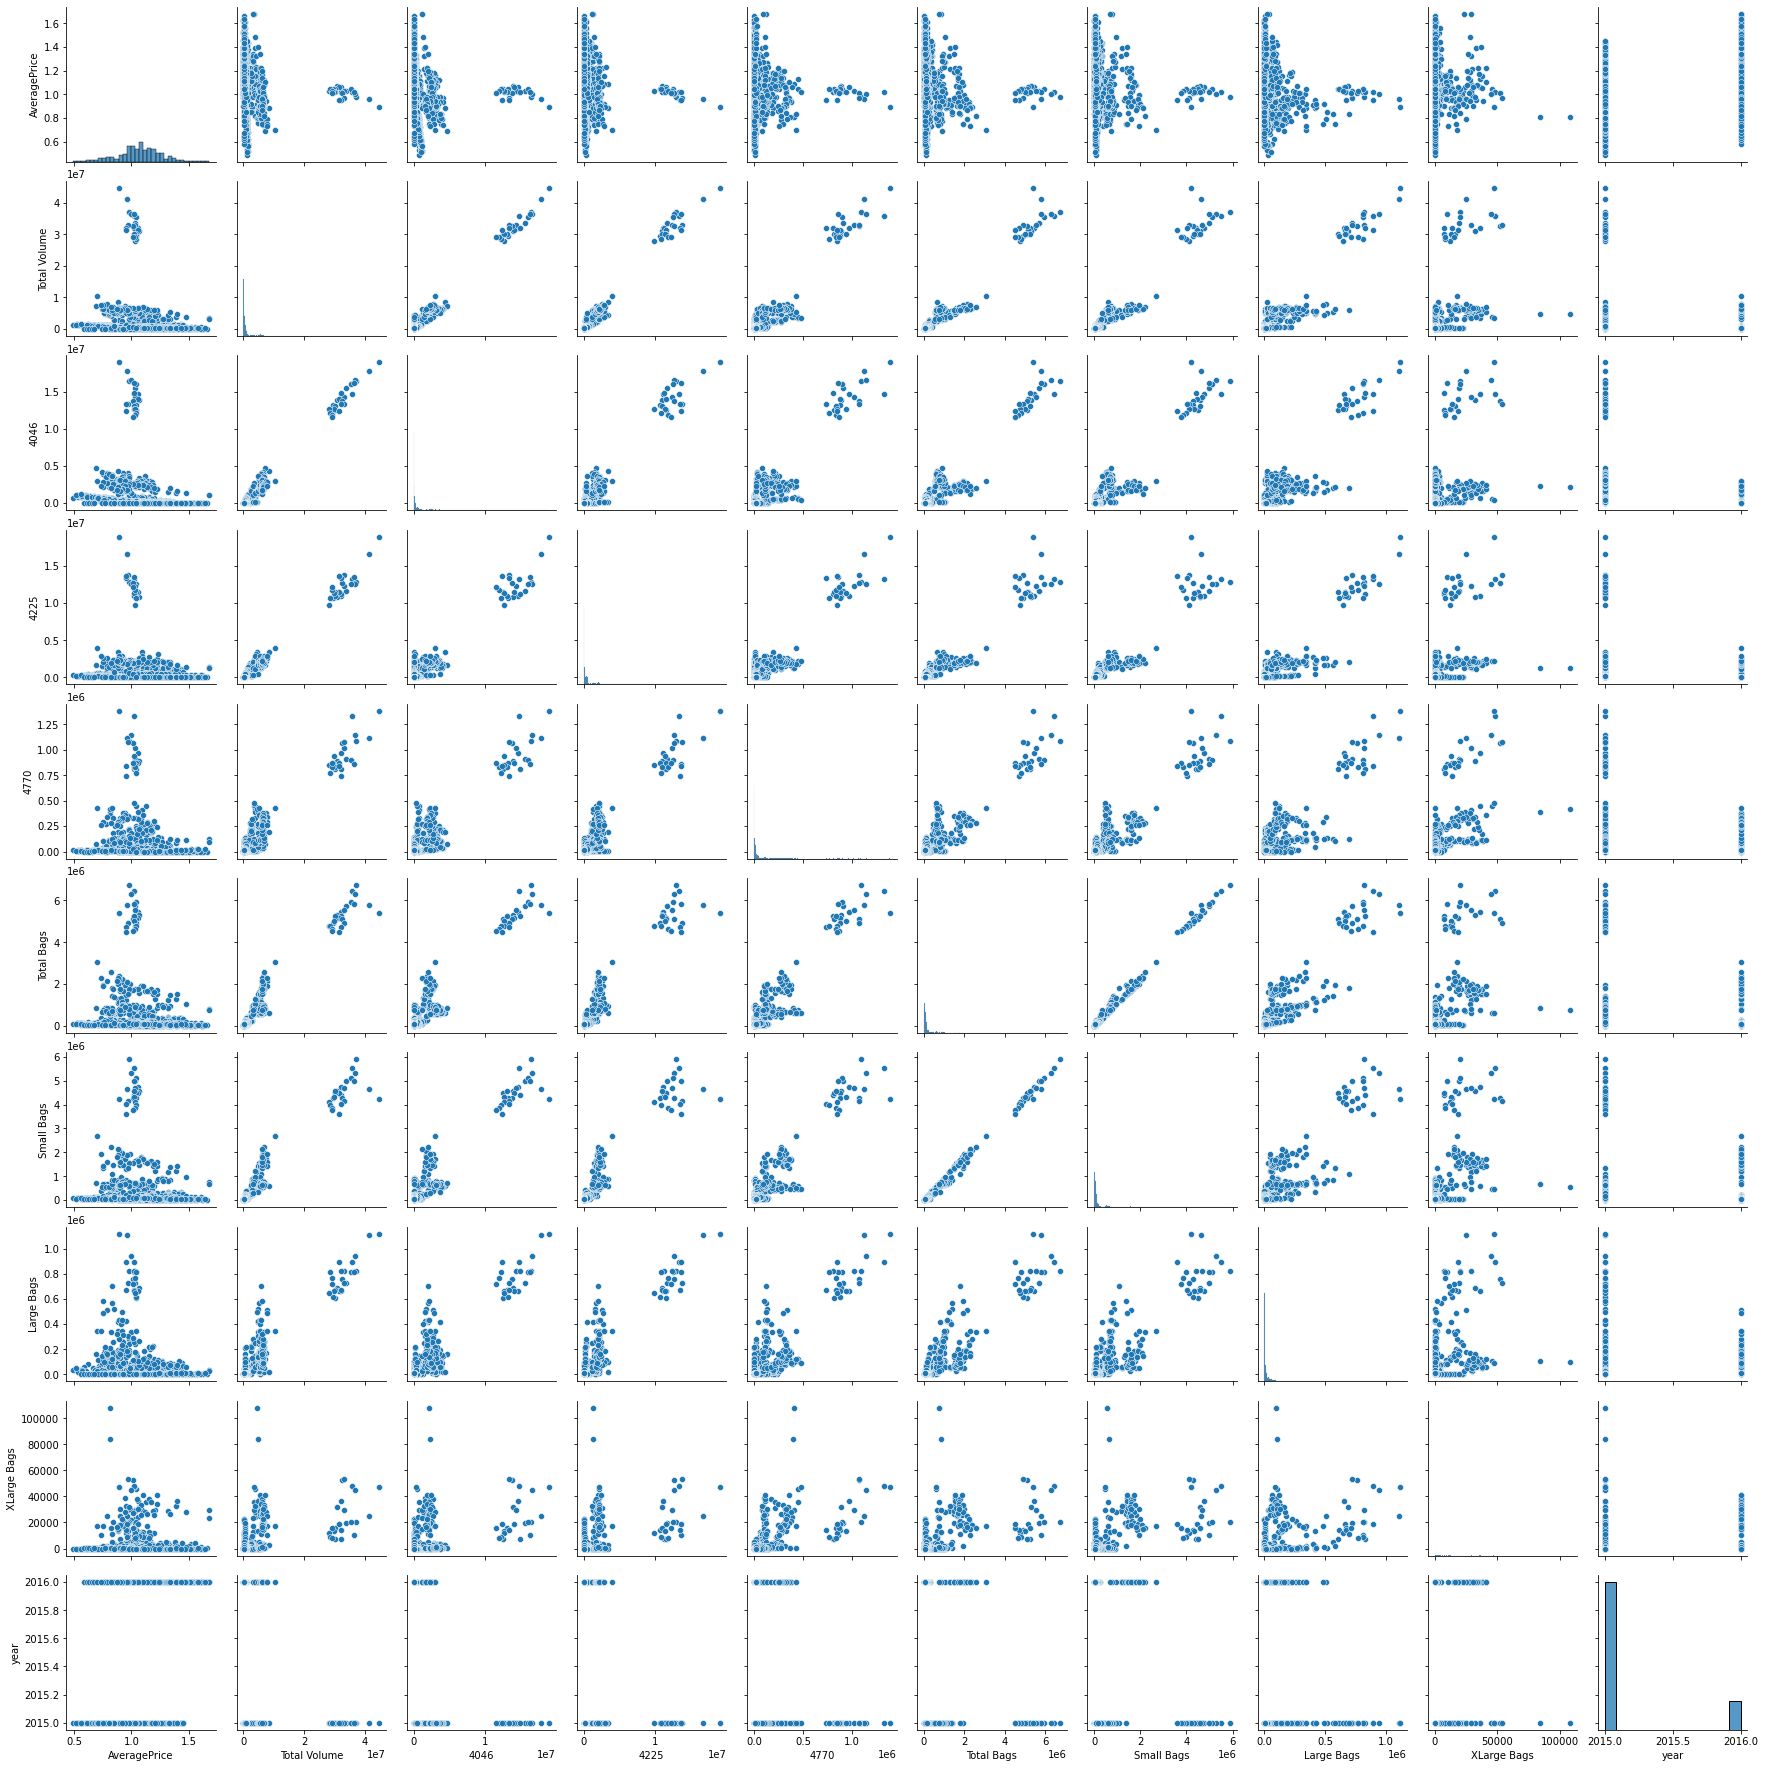

In [27]:
sns.pairplot(ds)

In [28]:
ds.drop('year', axis = 1, inplace = True)

In [29]:
ds.drop('Date', axis = 1, inplace=True)

In [30]:
ds.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany


lets now encode the categorical variable type and region so that it will be easy us to find out relation

In [31]:
cate = ['type','region']

In [32]:
le = LabelEncoder()

In [33]:
for c in cate:
    ds[c] = le.fit_transform(ds[c])

from above code we have successfully converted our categorical variable to numeric values lets no see the correlation

In [34]:
ds.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region
AveragePrice,1.000000,-0.140470,-0.190096,-0.092084,-0.100567,-0.111597,-0.097682,-0.177480,-0.048284,NaN,-0.229408
Total Volume,-0.140470,1.000000,0.985568,0.987154,0.934347,0.967689,0.960642,0.910226,0.521717,NaN,0.236579
4046,-0.190096,0.985568,1.000000,0.951952,0.898570,0.930395,0.922278,0.884229,0.474063,NaN,0.269481
4225,-0.092084,0.987154,0.951952,1.000000,0.927757,0.951779,0.943988,0.900496,0.504718,NaN,0.215733
4770,-0.100567,0.934347,0.898570,0.927757,1.000000,0.926405,0.923607,0.840523,0.646053,NaN,0.138092
Total Bags,-0.111597,0.967689,0.930395,0.951779,0.926405,1.000000,0.997341,0.911336,0.601856,NaN,0.190001
Small Bags,-0.097682,0.960642,0.922278,0.943988,0.923607,0.997341,1.000000,0.879131,0.611300,NaN,0.168650
Large Bags,-0.177480,0.910226,0.884229,0.900496,0.840523,0.911336,0.879131,1.000000,0.447779,NaN,0.297452
XLarge Bags,-0.048284,0.521717,0.474063,0.504718,0.646053,0.601856,0.611300,0.447779,1.000000,NaN,-0.046144
type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


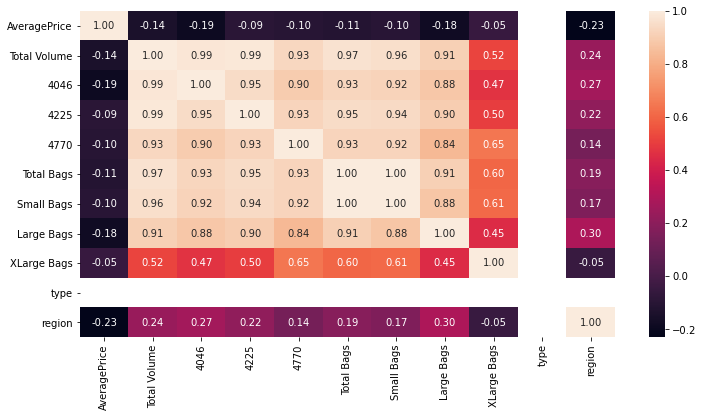

In [35]:
plt.figure(figsize = (12,6))
sns.heatmap(ds.corr(), annot = True, fmt='.2f')

so from above we can see that type of avocado don't have any relation so we will remove it from the dataset

In [36]:
ds.drop('type', axis = 1, inplace=True)

In [37]:
ds.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0


lets now see skewness in the dataset

we can see the skewness using ds.skew()

In [38]:
ds.skew()

AveragePrice   -0.109444
Total Volume    6.200138
4046            6.051830
4225            6.394926
4770            5.405164
Total Bags      5.366378
Small Bags      5.355185
Large Bags      5.144495
XLarge Bags     5.775077
region          0.288146
dtype: float64

we can see right skewed data in the dataset so we will fix it using power transform

lets visualize the skewness using density plot

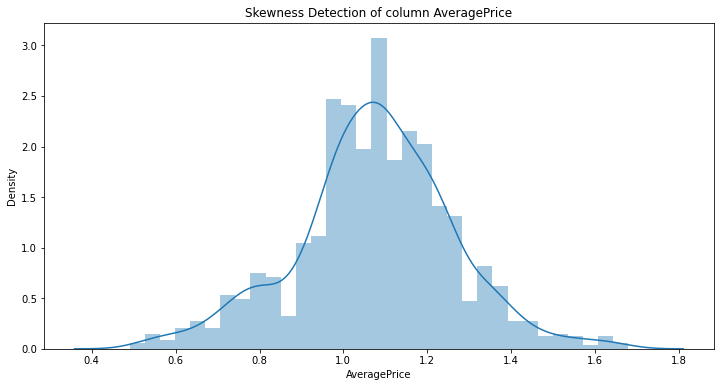

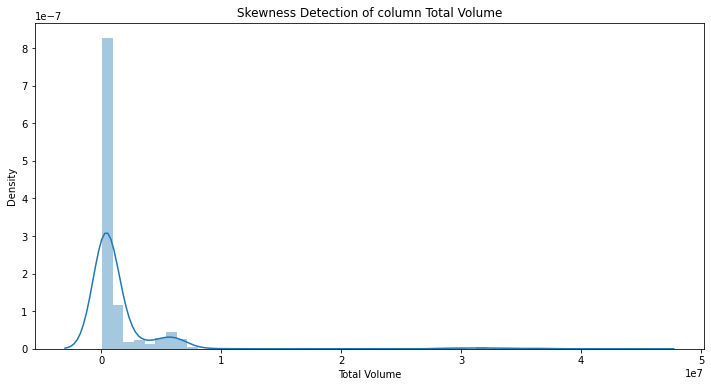

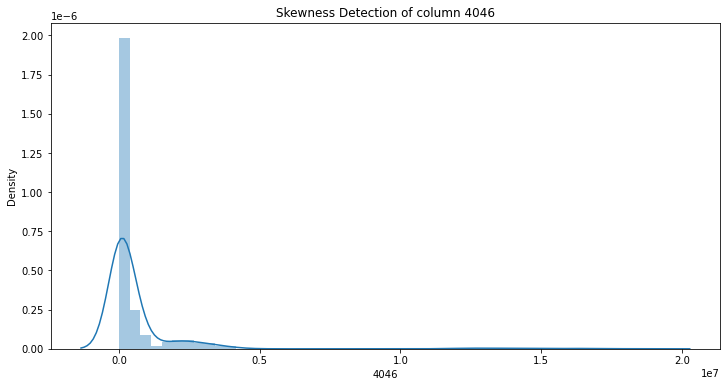

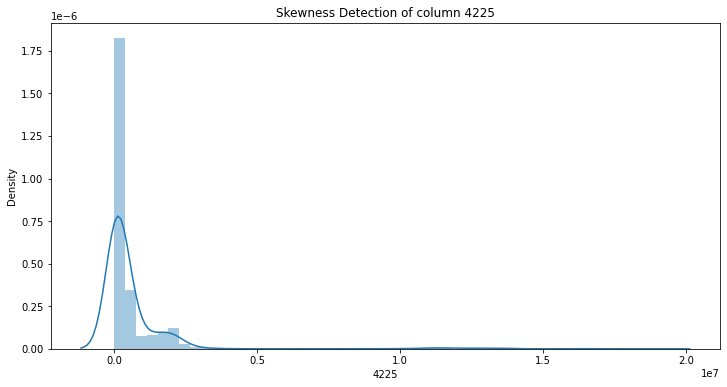

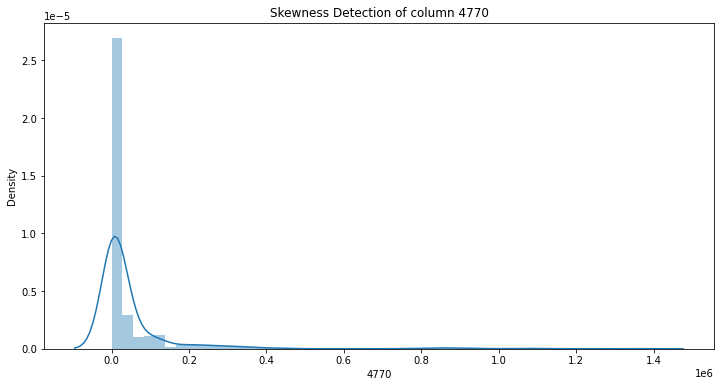

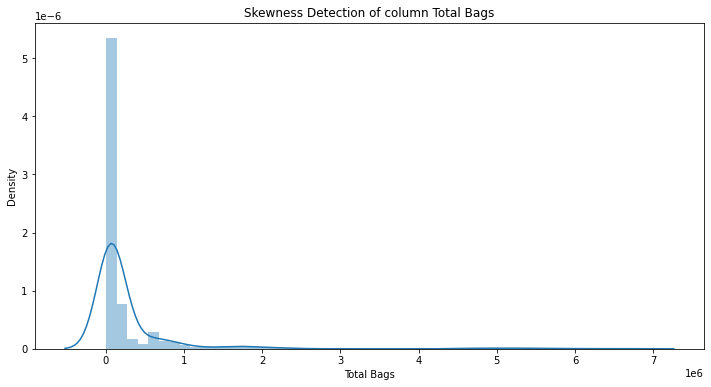

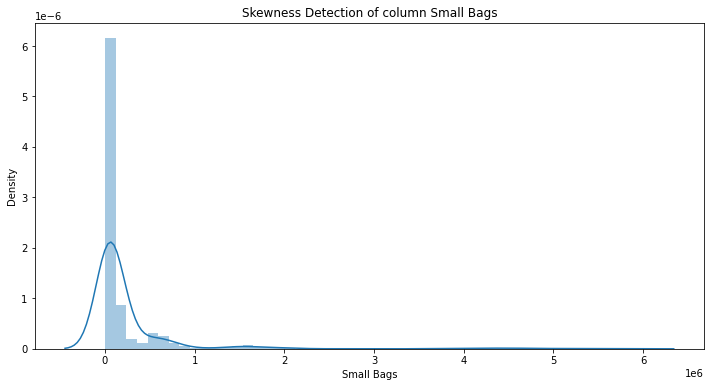

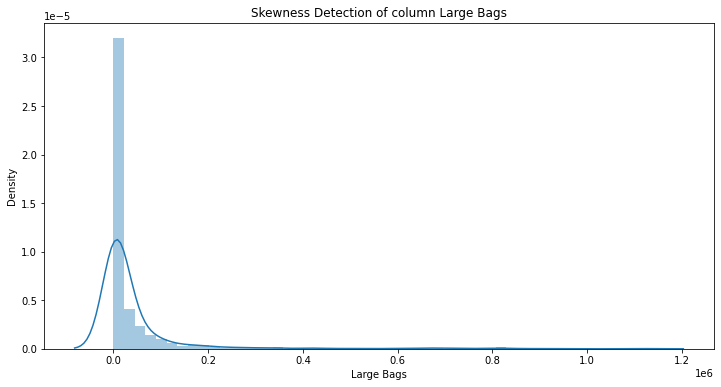

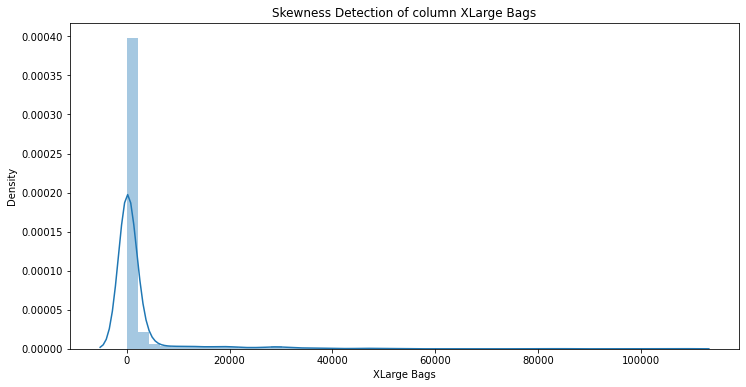

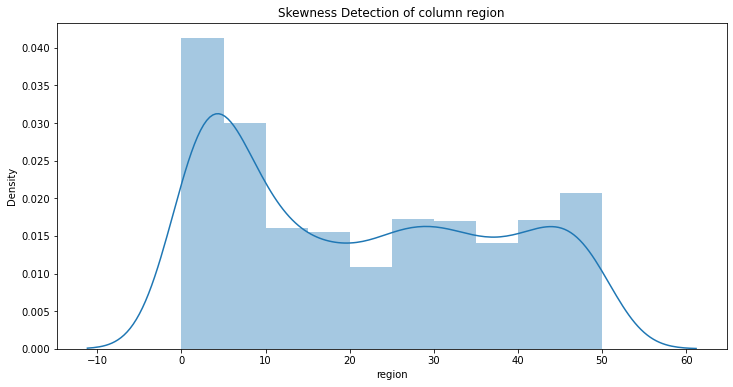

In [39]:
for c in ds.columns:
    plt.figure(figsize = (12,6))
    plt.title("Skewness Detection of column {}".format(c))
    sns.distplot(ds[c])

In [40]:
columns = ['4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags']

In [41]:
ds[columns] = power_transform(ds[columns])

In [42]:
ds

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,region
0,1.33,64236.62,-1.757736,-0.545363,-1.675878,-2.030217,-1.847586,-1.072172,-0.885019,0
1,1.35,54876.98,-1.919557,-0.667814,-1.619934,-1.931468,-1.748426,-1.062461,-0.885019,0
2,0.93,118220.22,-1.857996,-0.124940,-1.375858,-2.103934,-1.923541,-1.050081,-0.885019,0
3,1.08,78992.15,-1.724410,-0.375219,-1.555093,-2.497084,-2.330946,-0.991861,-0.885019,0
4,1.28,51039.60,-1.794175,-0.679011,-1.542167,-2.422996,-2.267260,-0.900922,-0.885019,0
...,...,...,...,...,...,...,...,...,...,...
1512,1.39,190846.01,-0.143482,-0.524209,0.417378,-0.194163,-0.187173,0.290436,1.015265,7
1513,1.51,178235.75,-0.263771,-0.571452,0.460902,-0.143253,-0.095933,0.221726,-0.885019,7
1514,1.48,178410.82,-0.235102,-0.563222,0.397721,-0.154530,-0.116137,0.207083,1.225016,7
1515,1.47,189131.52,-0.169554,-0.555147,0.416497,-0.135323,-0.082297,0.207968,-0.885019,7


In [43]:
ds.skew()

AveragePrice   -0.109444
Total Volume    6.200138
4046           -0.012059
4225            0.008450
4770           -0.032945
Total Bags      0.005205
Small Bags      0.027632
Large Bags     -0.074795
XLarge Bags     0.417289
region          0.288146
dtype: float64

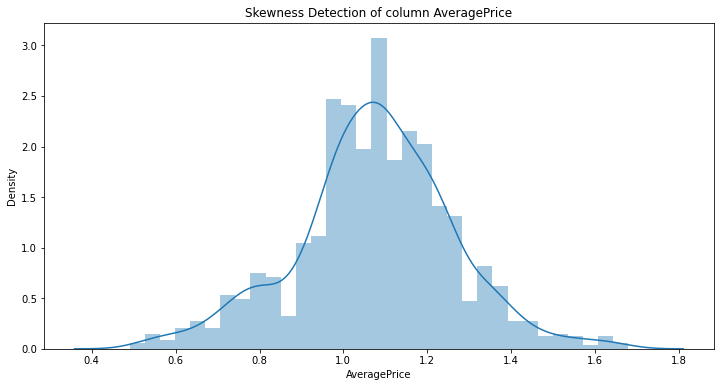

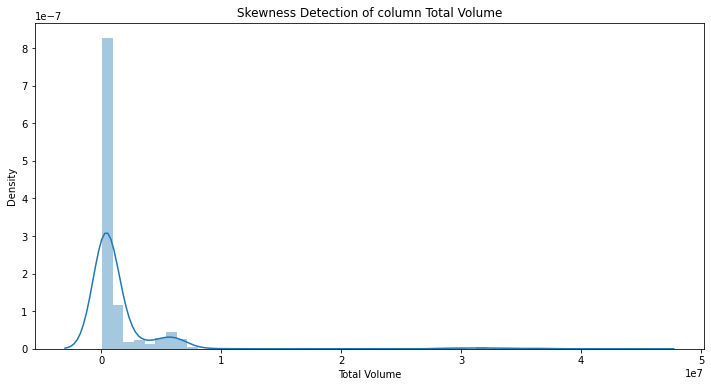

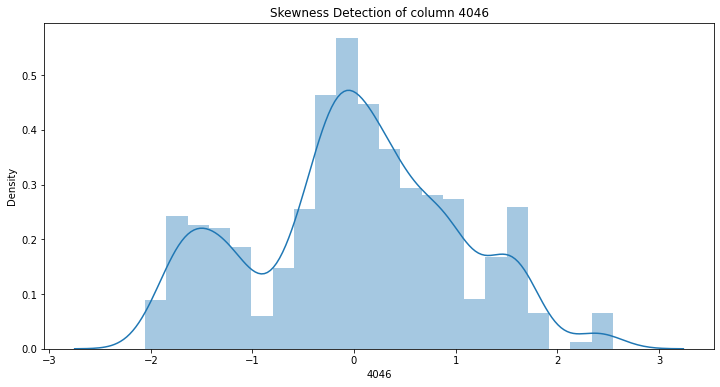

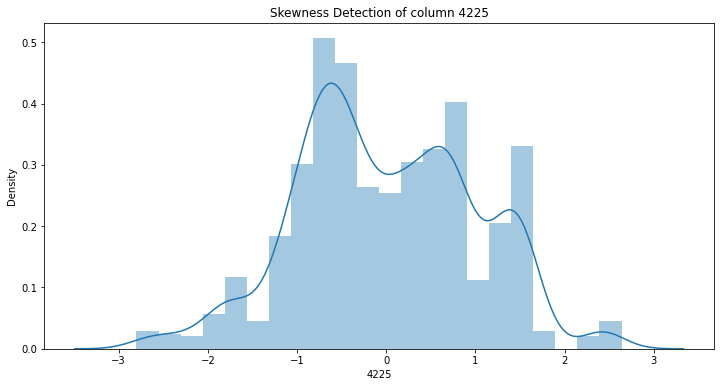

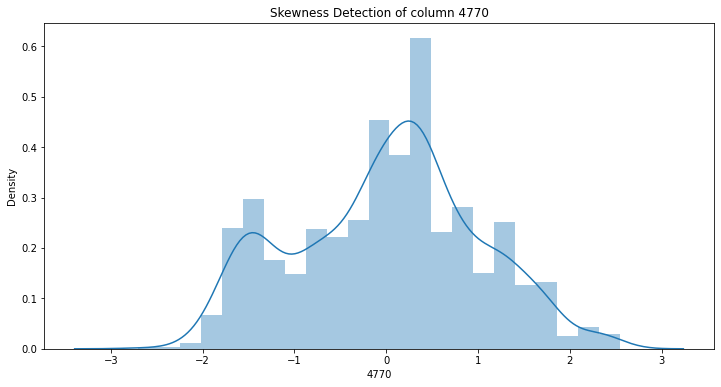

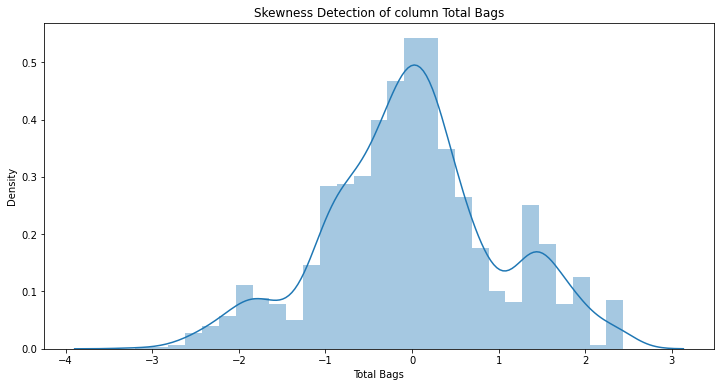

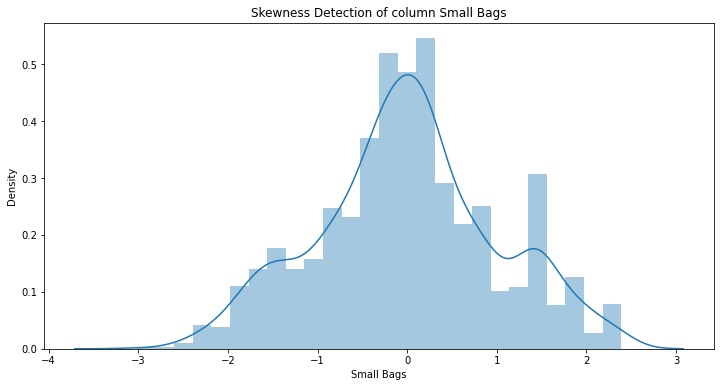

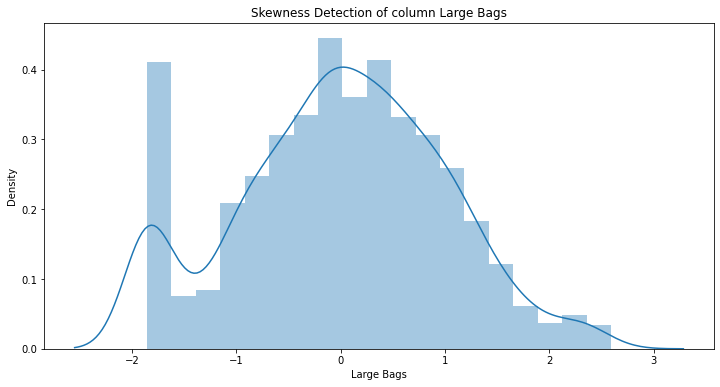

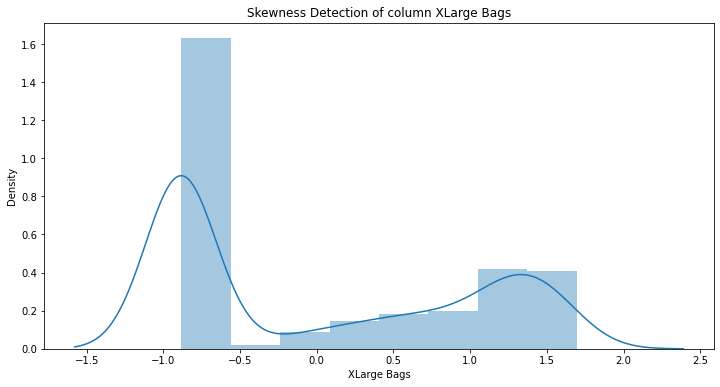

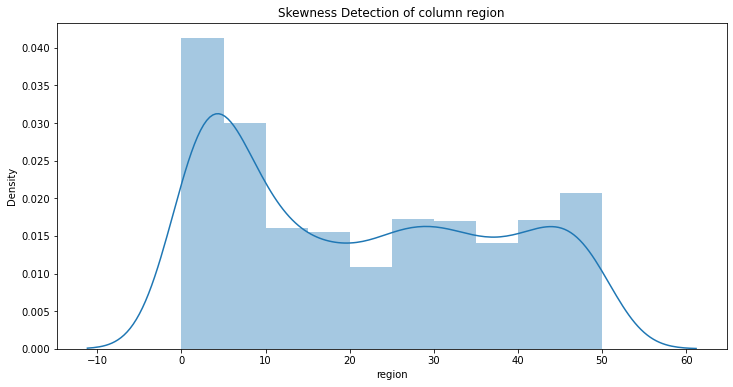

In [44]:
for c in ds.columns:
    plt.figure(figsize = (12,6))
    plt.title("Skewness Detection of column {}".format(c))
    sns.distplot(ds[c])

lets see the outliers in the dataset using boxplot

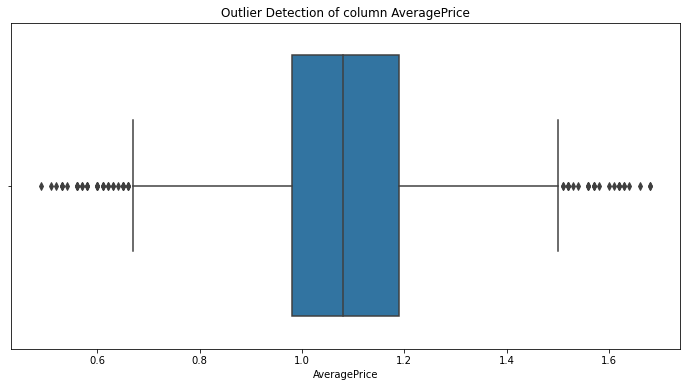

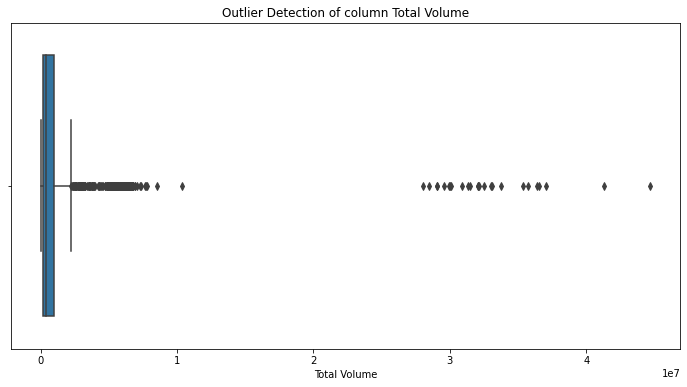

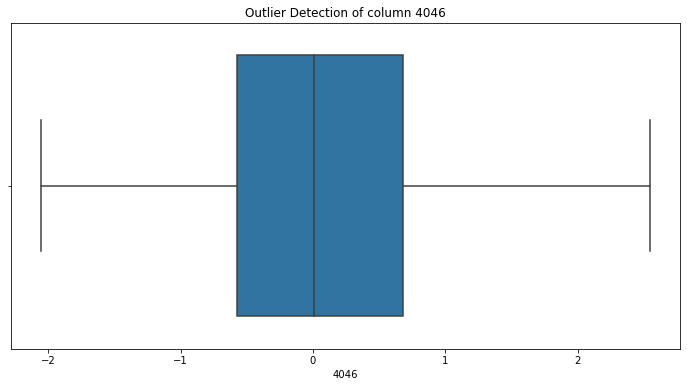

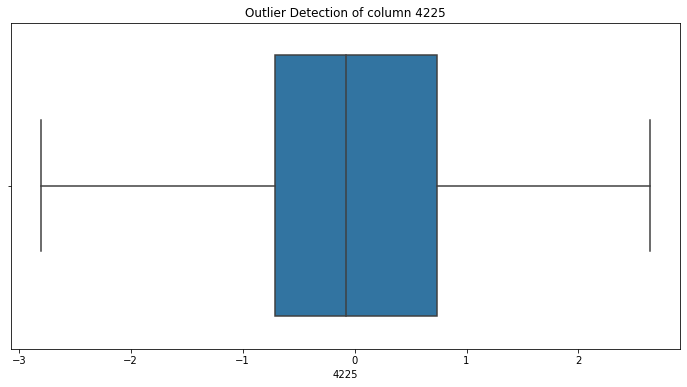

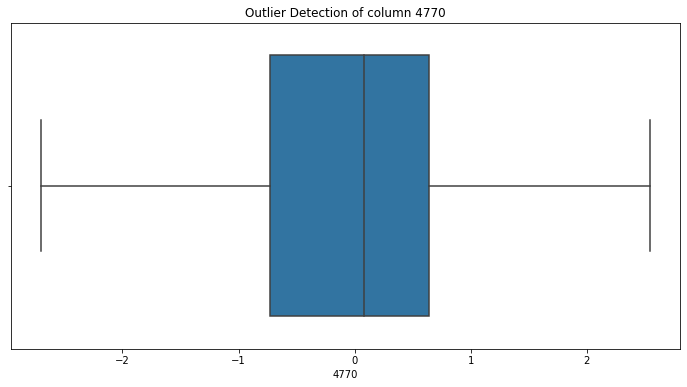

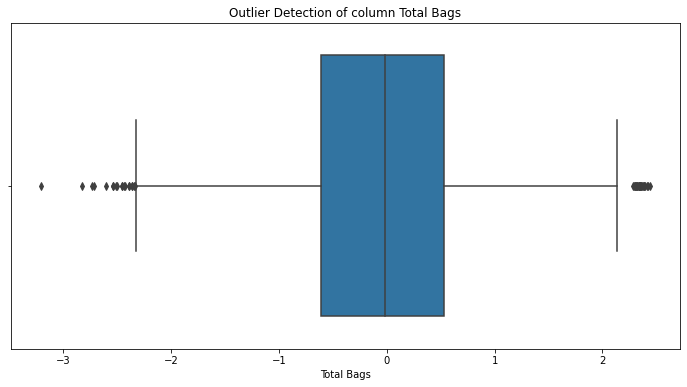

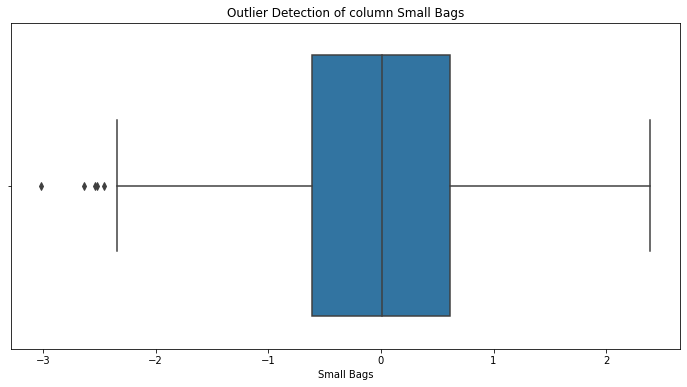

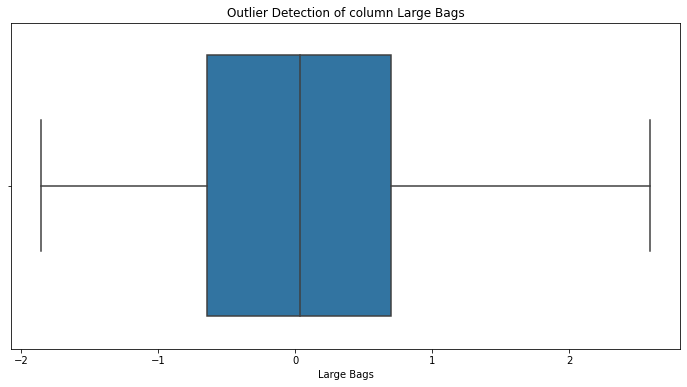

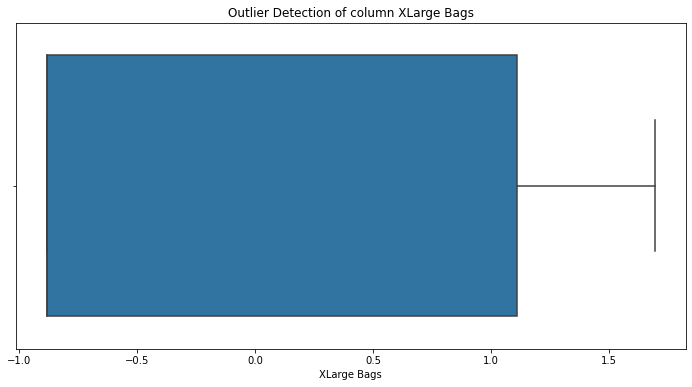

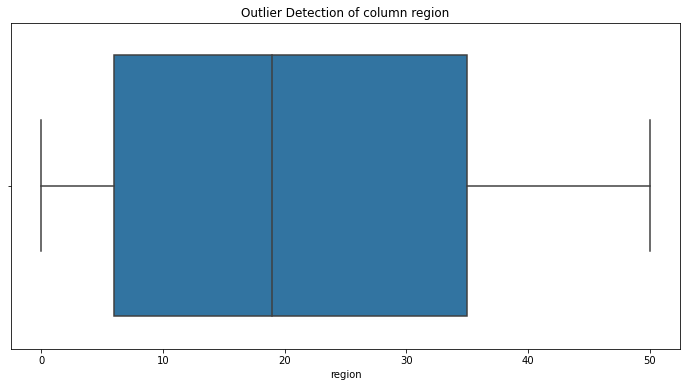

In [45]:
for c in ds.columns:
    plt.figure(figsize = (12,6))
    plt.title("Outlier Detection of column {}".format(c))
    sns.boxplot(ds[c])

we can see that there are many outliers in the dataset so we will remove it using zscore method

In [46]:
zscr = np.abs(zscore(ds))
threshold = 2
print(np.where(zscr>3))

(array([ 154,  154,  760, 1182, 1183, 1184, 1185, 1186, 1187, 1188, 1189,
       1190, 1191, 1192, 1193, 1194, 1195, 1196, 1197, 1198, 1199, 1200,
       1201, 1202, 1203, 1204, 1205, 1206, 1411, 1457, 1458]), array([5, 6, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0]))


In [47]:
print("Shape before removing the outlier", ds.shape)

dsnew = ds[(zscr<3).all(axis=1)]

print("Shape after removing the outlier", dsnew.shape)

Shape before removing the outlier (1517, 10)
Shape after removing the outlier (1487, 10)


lets now see the total data loss if the data loss is in between 5% - 6% we will go forward with the new dataset

In [48]:
100 - (1487/1517)*100

1.9775873434410016

so we see that there is only 2% dataloss so we will go forward with the new dataset

In [49]:
ds = dsnew

in above tab we have converted out new dataset to old to keep it less complicated

In [50]:
ds

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,region
0,1.33,64236.62,-1.757736,-0.545363,-1.675878,-2.030217,-1.847586,-1.072172,-0.885019,0
1,1.35,54876.98,-1.919557,-0.667814,-1.619934,-1.931468,-1.748426,-1.062461,-0.885019,0
2,0.93,118220.22,-1.857996,-0.124940,-1.375858,-2.103934,-1.923541,-1.050081,-0.885019,0
3,1.08,78992.15,-1.724410,-0.375219,-1.555093,-2.497084,-2.330946,-0.991861,-0.885019,0
4,1.28,51039.60,-1.794175,-0.679011,-1.542167,-2.422996,-2.267260,-0.900922,-0.885019,0
...,...,...,...,...,...,...,...,...,...,...
1512,1.39,190846.01,-0.143482,-0.524209,0.417378,-0.194163,-0.187173,0.290436,1.015265,7
1513,1.51,178235.75,-0.263771,-0.571452,0.460902,-0.143253,-0.095933,0.221726,-0.885019,7
1514,1.48,178410.82,-0.235102,-0.563222,0.397721,-0.154530,-0.116137,0.207083,1.225016,7
1515,1.47,189131.52,-0.169554,-0.555147,0.416497,-0.135323,-0.082297,0.207968,-0.885019,7


In [51]:
X = ds.drop('AveragePrice', axis = 1)
Y = ds['AveragePrice']

lets now scale the values so that all the columns are in the same range

In [52]:
sc = StandardScaler()

In [53]:
X_new = sc.fit_transform(X)

In [54]:
X_new = pd.DataFrame(X_new, columns = X.columns)

In [55]:
X_new

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,region
0,-0.585242,-1.792579,-0.527278,-1.703252,-2.082359,-1.886800,-1.075719,-0.869040,-1.308399
1,-0.590660,-1.961569,-0.655338,-1.645013,-1.979110,-1.783416,-1.065602,-0.869040,-1.308399
2,-0.553991,-1.897280,-0.087598,-1.390922,-2.159436,-1.965989,-1.052706,-0.869040,-1.308399
3,-0.576700,-1.757777,-0.349341,-1.577511,-2.570500,-2.390743,-0.992054,-0.869040,-1.308399
4,-0.592882,-1.830632,-0.667048,-1.564055,-2.493037,-2.324344,-0.897317,-0.869040,-1.308399
...,...,...,...,...,...,...,...,...,...
1482,-0.511948,-0.106810,-0.505156,0.475891,-0.162639,-0.155678,0.343794,1.057604,-0.867707
1483,-0.519248,-0.232428,-0.554562,0.521201,-0.109410,-0.060553,0.272214,-0.869040,-0.867707
1484,-0.519147,-0.202489,-0.545956,0.455427,-0.121201,-0.081617,0.256960,1.270264,-0.867707
1485,-0.512940,-0.134037,-0.537510,0.474974,-0.101119,-0.046336,0.257881,-0.869040,-0.867707


from above we can see that all the data points are converted into same scale

lets split the data into training and testing dataset using train_test_split

In [56]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.22, random_state = 42)

now we have selected random_state as 42 later we will find the best random state and fit all the models

In [57]:
lr=LinearRegression()
lr.fit(X_train, Y_train)
predlr = lr.predict(X_test)
acc = r2_score(Y_test, predlr)
print(acc)

0.2842655605975024


lets now find the best model and best random state

In [58]:
models=[LinearRegression(), Lasso(), Ridge(), DecisionTreeRegressor(), RandomForestRegressor(), AdaBoostRegressor(), SVR(), KNeighborsRegressor()]

In [59]:
maxacc = 0
maxrs = 0
n = 0
for i in range(1,1000):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.22, random_state = i)
    for m in models:
        m.fit(X_train, Y_train)
        pred = m.predict(X_test)
        acc = r2_score(Y_test, pred)
        if acc > maxacc:
            maxacc = acc
            maxrs = i
            n = m
print("Maximum Accuracy is {} at Random State {} for model {}".format(maxacc, maxrs, n))

Maximum Accuracy is 0.8766613587228278 at Random State 573 for model RandomForestRegressor()


from above we can see that for Random Forest Regressor we got 88% accuracy score at random state 573 so now we will use 573 for all the models and then look at there accuracy score and then we will do cross validation and find the best model and save it

In [60]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.22, random_state = 573)

In [61]:
print("Linear Regression")
lr = LinearRegression()
lr.fit(X_train, Y_train)
predlr = lr.predict(X_test)
acclr  = r2_score(Y_test, predlr)*100
print("Accuracy Score:", acclr)
print("Mean Squared Error:", mean_squared_error(Y_test, predlr))
print("Abosulte Mean Squared Error:", mean_absolute_error(Y_test, predlr))
scorelr = cross_val_score(lr, X, Y, cv = 5)
scorelr = scorelr.mean()*100
print("After Cross Validation Score",scorelr)

Linear Regression
Accuracy Score: 43.27857707564486
Mean Squared Error: 0.022049457753171874
Abosulte Mean Squared Error: 0.1188474644291211
After Cross Validation Score 4.610406629671908


In [62]:
print("Lasso")
lasso = Lasso()
lasso.fit(X_train, Y_train)
predlass = lasso.predict(X_test)
acclass = r2_score(Y_test, predlass)*100
print("Accuracy Score:", acclass)
print("Mean Squared Error:", mean_squared_error(Y_test, predlass))
print("Mean Absolute Error:", mean_absolute_error(Y_test, predlass))
scorelass = cross_val_score(lasso, X, Y, cv = 5 )
scorelass = scorelass.mean()*100
print("After Cross Validation Score:", scorelass)

Lasso
Accuracy Score: 7.003232312602292
Mean Squared Error: 0.036150861430952495
Mean Absolute Error: 0.14711134843082388
After Cross Validation Score: 0.9449285566755861


In [63]:
print("Ridge")
ridge = Ridge()
ridge.fit(X_train, Y_train)
predreg = ridge.predict(X_test)
accreg = r2_score(Y_test, predreg)*100
print("Accuracy Score", accreg)
print("Mean Squared Error:", mean_squared_error(Y_test, predreg))
print("Mean Absolute Error:", mean_absolute_error(Y_test, predreg))
scorereg = cross_val_score(ridge, X, Y, cv = 5)
scorereg = scorereg.mean()*100
print("After Cross Validation:", scorereg)

Ridge
Accuracy Score 43.33109579319749
Mean Squared Error: 0.022029042023378353
Mean Absolute Error: 0.1188128345448001
After Cross Validation: 4.960044603636737


In [64]:
print("Decision Tree")
dtr = DecisionTreeRegressor()
dtr.fit(X_train, Y_train)
predtr = dtr.predict(X_test)
accdtr = r2_score(Y_test, predtr)*100
print("Accuracy Score:", accdtr)
print("Mean Squared Error:", mean_squared_error(Y_test, predtr))
print("Mean absolute Error:", mean_absolute_error(Y_test, predtr))
scoredtr = cross_val_score(dtr ,X, Y, cv = 5)
scoredtr = scoredtr.mean()*100
print("After Cross Validation:", scoredtr)

Decision Tree
Accuracy Score: 75.59845927653484
Mean Squared Error: 0.00948567073170732
Mean absolute Error: 0.06655487804878048
After Cross Validation: -44.73240464418849


In [65]:
print("Random Forest")
rfr = RandomForestRegressor()
rfr.fit(X_train , Y_train)
predrfr = rfr.predict(X_test)
accrfr = r2_score(Y_test, predrfr)*100
print("Accuracy Score", accrfr)
print("Mean Squared Error:", mean_squared_error(Y_test, predrfr))
print("Mean absoulte error:", mean_absolute_error(Y_test, predrfr))
scorerfr = cross_val_score(rfr, X, Y, cv = 5)
scorerfr = scorerfr.mean()*100
print("Score after cross validation:", scorerfr)

Random Forest
Accuracy Score 87.6471429358449
Mean Squared Error: 0.004801956402439023
Mean absoulte error: 0.05264695121951213
Score after cross validation: -8.412102438145585


In [66]:
print("Adaboost. Regressor")
adb = AdaBoostRegressor()
adb.fit(X_train , Y_train)
predadb = adb.predict(X_test)
accadb = r2_score(Y_test, predadb)*100
print("Accuracy Score", accadb)
print("Mean Squared Error:", mean_squared_error(Y_test, predadb))
print("Mean absoulte error:", mean_absolute_error(Y_test, predadb))
scoreadb = cross_val_score(adb, X, Y, cv = 5)
scoreadb = scoreadb.mean()*100
print("Score after cross validation:", scoreadb)

Adaboost. Regressor
Accuracy Score 63.85416092832763
Mean Squared Error: 0.014051060612965929
Mean absoulte error: 0.09795858641894871
Score after cross validation: -4.364347773610415


In [67]:
print("SVR")
svr = SVR()
svr.fit(X_train , Y_train)
predsvr = svr.predict(X_test)
accsvr = r2_score(Y_test, predsvr)*100
print("Accuracy Score", accsvr)
print("Mean Squared Error:", mean_squared_error(Y_test, predsvr))
print("Mean absoulte error:", mean_absolute_error(Y_test, predsvr))
scoresvr = cross_val_score(svr, X, Y, cv = 5)
scoresvr = scoresvr.mean()*100
print("Score after cross validation:", scoresvr)

SVR
Accuracy Score 22.46748866696616
Mean Squared Error: 0.03013940315663343
Mean absoulte error: 0.13966035563728002
Score after cross validation: -9.400271441059974


In [68]:
print('KNeighborsRegressor')
knn = KNeighborsRegressor()
knn.fit(X_train , Y_train)
predknn = knn.predict(X_test)
accknn = r2_score(Y_test, predknn)*100
print("Accuracy Score", accknn)
print("Mean Squared Error:", mean_squared_error(Y_test, predknn))
print("Mean absoulte error:", mean_absolute_error(Y_test, predknn))
scoreknn = cross_val_score(knn, X, Y, cv = 5)
scoreknn = scoresvr.mean()
print("Score after cross validation:", scoreknn)

KNeighborsRegressor
Accuracy Score 14.121289889155308
Mean Squared Error: 0.03338384146341463
Mean absoulte error: 0.13878658536585364
Score after cross validation: -9.400271441059974


In [69]:
diff = {
    'Model Name':['Linear Regression','Lasso','Ridge','Decision Tree','Random Forest','Adaboost','SVR', 'KNeighbors Regressor'],
    'Accuracy Score' : [acclr, acclass, accreg, accdtr, accrfr, accadb, accsvr, accknn],
    'Cross Validation Score': [scorelr, scorelass, scorereg, scoredtr, scorerfr, scoreadb, scoresvr, scoreknn],
    'Accuracy Score - Cross Validation Score': [acclr-scorelr, acclass-scorelass, accreg-scorereg,accdtr-scoredtr, accrfr-scorerfr, accadb-scoreadb, accsvr-scoresvr, accknn-scoreknn]
}

In [70]:
difference = pd.DataFrame.from_dict(diff)

In [71]:
difference

,Model Name,Accuracy Score,Cross Validation Score,Accuracy Score - Cross Validation Score
0,Linear Regression,43.278577,4.610407,38.668170
1,Lasso,7.003232,0.944929,6.058304
2,Ridge,43.331096,4.960045,38.371051
3,Decision Tree,75.598459,-44.732405,120.330864
4,Random Forest,87.647143,-8.412102,96.059245
5,Adaboost,63.854161,-4.364348,68.218509
6,SVR,22.467489,-9.400271,31.867760
7,KNeighbors Regressor,14.121290,-9.400271,23.521561


so form above we can see that Random Forest is the best model so we will do GridSearchCV to Random Forest algorithm and lets see how much we can increase the accuracy score

In [72]:
parameterrfr = {
    'n_estimators':[100,200],
    'criterion':['mse','mae'],
    'max_depth':[2,4,5,6,8],
    'n_jobs':[1,2,3,4]
}

In [73]:
GSCVrfr = GridSearchCV(rfr, parameterrfr)
GSCVrfr.fit(X_train, Y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'max_depth': [2, 4, 5, 6, 8],
                         'n_estimators': [100, 200], 'n_jobs': [1, 2, 3, 4]})

In [74]:
GSCV_predictrfr = GSCVrfr.best_estimator_.predict(X_test)

In [75]:
r2_score(Y_test, GSCV_predictrfr)

0.8457370785137698

lets now do it for other algorithms too

In [76]:
parameterknn = {
    'n_neighbors':np.arange(1,10),
    'weights':['uniform','distance'],
    'algorithm':['auto','ball_tree','kd_tree','brute'],
    'n_jobs':np.arange(1,10)
}

In [77]:
GSCVknn = GridSearchCV(knn, parameterknn)

In [78]:
GSCVknn.fit(X_train, Y_train)
GSCV_predictknn = GSCVknn.best_estimator_.predict(X_test)
r2_score(Y_test, GSCV_predictknn)

0.20650832898574445

In [79]:
parameterlr = {
    'n_jobs':np.arange(1,10)
}

In [80]:
parameterlass = {
    'alpha':np.arange(1.0,2.0,0.1),
    'selection':['cyclic','random']
}

In [81]:
parametereg = {
    'alpha':np.arange(1.0,2.0,0.1),
    'max_iter':np.arange(1,10),
    'solver' :['autop', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
}

In [82]:
GSCVlr = GridSearchCV(lr, parameterlr)
GSCVlass = GridSearchCV(lasso, parameterlass)
GSCVreg = GridSearchCV(ridge, parametereg)

In [83]:
GSCVlr.fit(X_train, Y_train)
GSCVlass.fit(X_train, Y_train)
GSCVreg.fit(X_train, Y_train)

GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9]),
                         'max_iter': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'solver': ['autop', 'svd', 'cholesky', 'lsqr',
                                    'sparse_cg', 'sag', 'saga']})

In [84]:
GSCV_predictlr = GSCVlr.best_estimator_.predict(X_test)
GSCV_predictlass = GSCVlass.best_estimator_.predict(X_test)
GSCV_predictreg = GSCVreg.best_estimator_.predict(X_test)

In [85]:
r2_score(Y_test, GSCV_predictlr)

0.43278577075644864

In [86]:
r2_score(Y_test, GSCV_predictlass)

0.07003232312602292

In [87]:
r2_score(Y_test, GSCV_predictreg)

0.4333109579321507

In [88]:
r2_score(Y_test, GSCV_predictknn)

0.20650832898574445

from above accuracy score we can see that Random Forest has performed well so we will save Random Forest as our best model

In [89]:
print("Random Forest Performance Metrics")
print("Accuracy Score:", r2_score(Y_test, GSCV_predictrfr))
print("Mean Squared Error:",mean_squared_error(Y_test, GSCV_predictrfr))
print("Mean Absolute Error:", mean_absolute_error(Y_test, GSCV_predictrfr))

Random Forest Performance Metrics
Accuracy Score: 0.8457370785137698
Mean Squared Error: 0.005996700355574118
Mean Absolute Error: 0.05986454954871566


using joblib.dump we will save our model for further usage

In [90]:
joblib.dump(GSCVrfr.best_estimator_,'AvocadoPricePrediction.pkl')

['AvocadoPricePrediction.pkl']

As we have saved the model lets now view the predected values and the actual values

In [91]:
Predicted = GSCV_predictrfr

In [92]:
comp = {
    'True Values':Y_test,
    'Predicted Values':Predicted
}

In [93]:
compare = pd.DataFrame.from_dict(comp)

In [94]:
compare

,True Values,Predicted Values
30,1.23,1.296330
157,1.17,1.155197
1115,1.09,1.207371
4,1.28,1.203007
146,0.96,1.027940
...,...,...
8,1.02,1.223404
231,1.21,1.199086
1419,1.45,1.358351
463,0.79,0.768625


Now we can see the comparasion between the true values and the predicted values

### So by using the AvocadoPricePrediction.pkl we can predict other Avocado Dataset with similiar column too